# Import Data & Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.io as pio
import plotly.graph_objects as go
from IPython.display import HTML

In [4]:
# Read in tables
teams = pd.read_csv('Teams.csv')
batting = pd.read_csv('Batting.csv')
pitching = pd.read_csv('Pitching.csv')
#fielding = pd.read_csv('Fielding.csv')
#master = pd.read_csv('Master.csv')

In [5]:
teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN


In [6]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2805 non-null   int64  
 1   lgID            2755 non-null   object 
 2   teamID          2805 non-null   object 
 3   franchID        2805 non-null   object 
 4   divID           1288 non-null   object 
 5   Rank            2805 non-null   int64  
 6   G               2805 non-null   int64  
 7   Ghome           2406 non-null   float64
 8   W               2805 non-null   int64  
 9   L               2805 non-null   int64  
 10  DivWin          1260 non-null   object 
 11  WCWin           624 non-null    object 
 12  LgWin           2777 non-null   object 
 13  WSWin           2448 non-null   object 
 14  R               2805 non-null   int64  
 15  AB              2805 non-null   int64  
 16  H               2805 non-null   int64  
 17  2B              2805 non-null   i

In [7]:
# Use data from 1961 and onwards - First year teams played 162 games in a season
teams = teams[teams['yearID'] > 1960]
teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1359,1961,AL,BAL,BAL,NaN,3,163,82.0,95,67,...,173.0,0.980,Baltimore Orioles,Memorial Stadium,951089.0,96,96,BAL,BAL,BAL
1360,1961,AL,BOS,BOS,NaN,6,163,82.0,76,86,...,140.0,0.970,Boston Red Sox,Fenway Park II,850589.0,102,103,BOS,BOS,BOS
1361,1961,AL,CHA,CHW,NaN,4,163,81.0,86,76,...,138.0,0.980,Chicago White Sox,Comiskey Park,1146019.0,99,97,CHW,CHA,CHA
1362,1961,NL,CHN,CHC,NaN,7,156,78.0,64,90,...,175.0,0.970,Chicago Cubs,Wrigley Field,673057.0,101,104,CHC,CHN,CHN
1363,1961,NL,CIN,CIN,NaN,1,154,77.0,93,61,...,124.0,0.970,Cincinnati Reds,Crosley Field,1117603.0,102,101,CIN,CIN,CIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN


In [8]:
# Exclude years 1972, 1981, 1994, 1995 (Labor Strikes), and 2020 (Pandemic)
teams = teams[~teams['yearID'].isin([1972, 1981, 1994, 1995, 2020])]
teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1359,1961,AL,BAL,BAL,NaN,3,163,82.0,95,67,...,173.0,0.980,Baltimore Orioles,Memorial Stadium,951089.0,96,96,BAL,BAL,BAL
1360,1961,AL,BOS,BOS,NaN,6,163,82.0,76,86,...,140.0,0.970,Boston Red Sox,Fenway Park II,850589.0,102,103,BOS,BOS,BOS
1361,1961,AL,CHA,CHW,NaN,4,163,81.0,86,76,...,138.0,0.980,Chicago White Sox,Comiskey Park,1146019.0,99,97,CHW,CHA,CHA
1362,1961,NL,CHN,CHC,NaN,7,156,78.0,64,90,...,175.0,0.970,Chicago Cubs,Wrigley Field,673057.0,101,104,CHC,CHN,CHN
1363,1961,NL,CIN,CIN,NaN,1,154,77.0,93,61,...,124.0,0.970,Cincinnati Reds,Crosley Field,1117603.0,102,101,CIN,CIN,CIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN


In [9]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 1359 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          1340 non-null   int64  
 1   lgID            1340 non-null   object 
 2   teamID          1340 non-null   object 
 3   franchID        1340 non-null   object 
 4   divID           1182 non-null   object 
 5   Rank            1340 non-null   int64  
 6   G               1340 non-null   int64  
 7   Ghome           1340 non-null   float64
 8   W               1340 non-null   int64  
 9   L               1340 non-null   int64  
 10  DivWin          1182 non-null   object 
 11  WCWin           596 non-null    object 
 12  LgWin           1340 non-null   object 
 13  WSWin           1340 non-null   object 
 14  R               1340 non-null   int64  
 15  AB              1340 non-null   int64  
 16  H               1340 non-null   int64  
 17  2B              1340 non-null   int

In [10]:
teams.isnull().sum()

,0
yearID,0
lgID,0
teamID,0
franchID,0
divID,158
Rank,0
G,0
Ghome,0
W,0
L,0


In [11]:
#teams['divID'].fillna('unknown', inplace=True) - Drop?\
teams.drop('divID', axis = 1, inplace = True)
#teams['DivWin'] to binary 1 (Y) or (0) and 0 for unknown
teams.drop('DivWin', axis = 1, inplace = True)
teams.drop('WCWin', axis = 1, inplace = True)
#teams['WCWin'] to binary 1 (Y) or (0) and 0 for unknown
#teams['LgWin'] to binary 1 (Y) or (0) and 0 for unknown
#teams['WSWin'] to binary 1 (Y) or (0) and 0 for unknown
#teams['HBP'].fillna w/ mean? Helps with on base percentages
teams['HBP'].fillna(round(teams.groupby('yearID')['HBP'].mean(), 0), inplace = True)
#teams['SF'].fillna w/ mean?
teams['SF'].fillna(round(teams.groupby('yearID')['SF'].mean(), 0), inplace = True)

<ipython-input-11-58f0f6a7cddf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-58f0f6a7cddf>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-58f0f6a7cddf>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-58f0f6a7cddf>:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in p

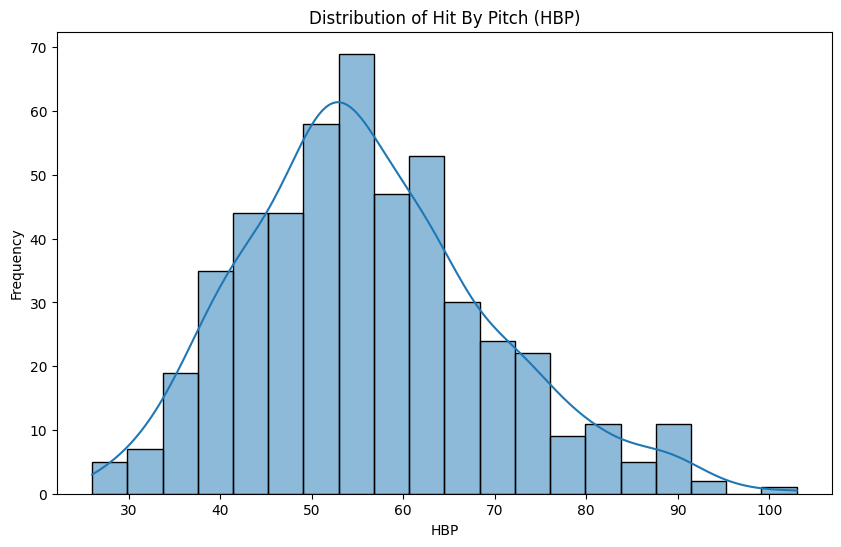

In [12]:
# Histogram to visualize HBP distribution
plt.figure(figsize=(10,6))
sns.histplot(teams['HBP'], bins=20, kde=True)
plt.title('Distribution of Hit By Pitch (HBP)')
plt.xlabel('HBP')
plt.ylabel('Frequency')
plt.show()

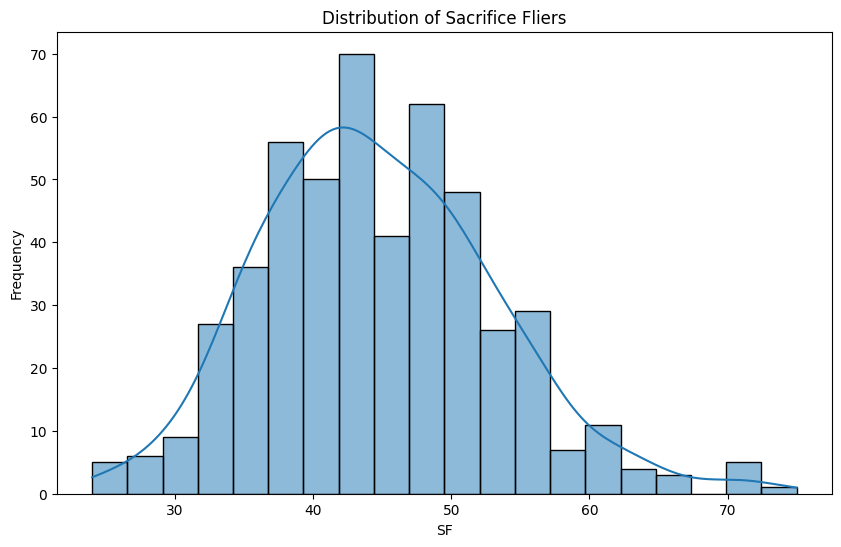

In [13]:
# Histogram to visualize HBP distribution
plt.figure(figsize=(10,6))
sns.histplot(teams['SF'], bins=20, kde=True)
plt.title('Distribution of Sacrifice Fliers')
plt.xlabel('SF')
plt.ylabel('Frequency')
plt.show()

In [14]:
teams[teams['HBP'] == 0]

,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,LgWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro


In [15]:
teams[teams['SF'] == 0]

,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,LgWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro


In [16]:
# Fill missing values for DivWin and WCWin with 'N'
#teams['DivWin'].fillna('N', inplace=True)
#teams['WCWin'].fillna('N', inplace=True)
# Fill missing values for HBP and SF with the median
teams['HBP'].fillna(teams['HBP'].mean(), inplace=True)
teams['SF'].fillna(teams['SF'].mean(), inplace=True)

<ipython-input-16-356152ee78f0>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-16-356152ee78f0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-356152ee78f0>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will

In [17]:
teams['teamID'].unique()

array(['BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'DET', 'KC1', 'LAA',
       'LAN', 'MIN', 'ML1', 'NYA', 'PHI', 'PIT', 'SFN', 'SLN', 'WS2',
       'HOU', 'NYN', 'CAL', 'ATL', 'OAK', 'KCA', 'MON', 'SDN', 'SE1',
       'ML4', 'TEX', 'SEA', 'TOR', 'COL', 'FLO', 'ANA', 'ARI', 'MIL',
       'TBA', 'WAS', 'MIA'], dtype=object)

In [18]:
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'Rank', 'G', 'Ghome', 'W', 'L',
       'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB',
       'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA',
       'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance',
       'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [19]:
# Add Batting Average to Teams
teams['BA'] = round(teams['H'] / teams['AB'], 3)

<ipython-input-19-6ac77410bebc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
teams.dtypes

,0
yearID,int64
lgID,object
teamID,object
franchID,object
Rank,int64
G,int64
Ghome,float64
W,int64
L,int64
LgWin,object


___

In [21]:
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [22]:
# Use data from 1961 and onwards
batting = batting[batting['yearID'] > 1960]
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
41245,aaronha01,1961,1,ML1,NL,155,603.0,115.0,197.0,39.0,...,120.0,21.0,9.0,56.0,64.0,20.0,2.0,1.0,9.0,16.0
41246,adairje01,1961,1,BAL,AL,133,386.0,41.0,102.0,21.0,...,37.0,5.0,2.0,35.0,51.0,4.0,2.0,1.0,4.0,6.0
41247,adcocjo01,1961,1,ML1,NL,152,562.0,77.0,160.0,20.0,...,108.0,2.0,1.0,59.0,94.0,4.0,2.0,4.0,2.0,22.0
41248,aguirha01,1961,1,DET,AL,45,9.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,8.0,0.0,0.0,3.0,1.0,0.0
41249,allenbo04,1961,1,CLE,AL,48,12.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [23]:
# Exclude years 1972, 1981, 1994, 1995 (Labor Strikes), and 2020 (Pandemic)
batting = batting[~batting['yearID'].isin([1972, 1981, 1994, 1995, 2020])]
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
41245,aaronha01,1961,1,ML1,NL,155,603.0,115.0,197.0,39.0,...,120.0,21.0,9.0,56.0,64.0,20.0,2.0,1.0,9.0,16.0
41246,adairje01,1961,1,BAL,AL,133,386.0,41.0,102.0,21.0,...,37.0,5.0,2.0,35.0,51.0,4.0,2.0,1.0,4.0,6.0
41247,adcocjo01,1961,1,ML1,NL,152,562.0,77.0,160.0,20.0,...,108.0,2.0,1.0,59.0,94.0,4.0,2.0,4.0,2.0,22.0
41248,aguirha01,1961,1,DET,AL,45,9.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,8.0,0.0,0.0,3.0,1.0,0.0
41249,allenbo04,1961,1,CLE,AL,48,12.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [24]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55972 entries, 41245 to 101331
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  55972 non-null  object 
 1   yearID    55972 non-null  int64  
 2   stint     55972 non-null  int64  
 3   teamID    55972 non-null  object 
 4   lgID      55972 non-null  object 
 5   G         55972 non-null  int64  
 6   AB        51515 non-null  float64
 7   R         51515 non-null  float64
 8   H         51515 non-null  float64
 9   2B        51515 non-null  float64
 10  3B        51515 non-null  float64
 11  HR        51515 non-null  float64
 12  RBI       51515 non-null  float64
 13  SB        51515 non-null  float64
 14  CS        51515 non-null  float64
 15  BB        51515 non-null  float64
 16  SO        51515 non-null  float64
 17  IBB       51515 non-null  float64
 18  HBP       51515 non-null  float64
 19  SH        51515 non-null  float64
 20  SF        51515 non-null  fl

In [25]:
batting.isnull().sum()

,0
playerID,0
yearID,0
stint,0
teamID,0
lgID,0
G,0
AB,4457
R,4457
H,4457
2B,4457


In [26]:
# Fill in AB

# Fill in R (Run)
# Fill in H (Hits?)
# 2B (Double); Not vital, Drop?
# 3B (Triple); Not vital, Drop?
# Fill in HR (Home Run)
# Fill in RBI (Runs Batted In)
# Fill in SB (Stolen Base)
# Fill in CS (Caught Stealing)
# Fill in BB (Walk)
# Fill in SO (Strike Out)
# Fill in IBB (Intentional Walk)
# Fill in HBP (Hit By Pitch)
# SH (Sacrifice Bunt); Not vital, Drop?
# Fill in SF (Sacrifice Fly)
# GIDP (Ground Into Double Play)?

In [27]:
# Fill missing numerical values with 0
batting['AB'].fillna(round(batting['AB'].mean(), 0), inplace = True)
batting['R'].fillna(round(batting['R'].mean(), 0), inplace = True)
batting['H'].fillna(round(batting['H'].mean(), 0), inplace = True)
batting.drop('2B', axis = 1, inplace = True)
batting.drop('3B', axis = 1, inplace = True)
batting['HR'].fillna(round(batting['HR'].mean(), 0), inplace = True)
batting['RBI'].fillna(round(batting['RBI'].mean(), 0), inplace = True)
batting['SB'].fillna(round(batting['SB'].mean(), 0), inplace = True)
batting['CS'].fillna(round(batting['CS'].mean(), 0), inplace = True)
batting['BB'].fillna(round(batting['BB'].mean(), 0), inplace = True)
batting['SO'].fillna(round(batting['SO'].mean(), 0), inplace = True)
batting['IBB'].fillna(round(batting['IBB'].mean(), 0), inplace = True)
batting['HBP'].fillna(round(batting['HBP'].mean(), 0), inplace = True)
batting['SF'].fillna(round(batting['SF'].mean(), 0), inplace = True)
batting.drop('SH', axis = 1, inplace = True)
batting.drop('GIDP', axis = 1, inplace = True)

<ipython-input-27-6c5bb10564a8>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-27-6c5bb10564a8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-6c5bb10564a8>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will

In [28]:
batting.isnull().sum()

,0
playerID,0
yearID,0
stint,0
teamID,0
lgID,0
G,0
AB,0
R,0
H,0
HR,0


In [29]:
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SF'],
      dtype='object')

___

In [30]:
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,AL,11,6,34,18,0,...,0.0,5.0,0.0,0,500.0,3.0,44,4.0,2.0,NaN
44135,zieglbr01,2015,1,ARI,NL,0,3,66,0,0,...,3.0,2.0,1.0,0,263.0,46.0,17,1.0,0.0,NaN
44136,zimmejo02,2015,1,WAS,NL,13,10,33,33,0,...,3.0,2.0,8.0,1,831.0,0.0,89,8.0,2.0,NaN
44137,zitoba01,2015,1,OAK,AL,0,0,3,2,0,...,0.0,0.0,0.0,0,37.0,1.0,8,0.0,0.0,NaN


In [31]:
# Use data from 1961 and onwards
pitching = pitching[pitching['yearID'] > 1960]
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
16198,aguirha01,1961,1,DET,AL,4,4,45,0,0,...,3.0,4.0,2.0,0,244.0,21.0,22,NaN,NaN,NaN
16199,allenbo04,1961,1,CLE,AL,3,2,48,0,0,...,5.0,4.0,1.0,0,373.0,17.0,42,NaN,NaN,NaN
16200,anderbo01,1961,1,CHN,NL,7,10,57,12,1,...,11.0,4.0,2.0,0,659.0,21.0,85,NaN,NaN,NaN
16201,andercr01,1961,1,SLN,NL,4,3,25,0,0,...,0.0,3.0,1.0,0,164.0,13.0,15,NaN,NaN,NaN
16202,antonjo02,1961,1,CLE,AL,0,4,11,7,0,...,0.0,1.0,1.0,0,225.0,0.0,39,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,AL,11,6,34,18,0,...,0.0,5.0,0.0,0,500.0,3.0,44,4.0,2.0,NaN
44135,zieglbr01,2015,1,ARI,NL,0,3,66,0,0,...,3.0,2.0,1.0,0,263.0,46.0,17,1.0,0.0,NaN
44136,zimmejo02,2015,1,WAS,NL,13,10,33,33,0,...,3.0,2.0,8.0,1,831.0,0.0,89,8.0,2.0,NaN
44137,zitoba01,2015,1,OAK,AL,0,0,3,2,0,...,0.0,0.0,0.0,0,37.0,1.0,8,0.0,0.0,NaN


In [32]:
# Exclude years 1972, 1981, 1994, 1995 (Labor Strikes), and 2020 (Pandemic)
pitching = pitching[~pitching['yearID'].isin([1972, 1981, 1994, 1995, 2020])]
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
16198,aguirha01,1961,1,DET,AL,4,4,45,0,0,...,3.0,4.0,2.0,0,244.0,21.0,22,NaN,NaN,NaN
16199,allenbo04,1961,1,CLE,AL,3,2,48,0,0,...,5.0,4.0,1.0,0,373.0,17.0,42,NaN,NaN,NaN
16200,anderbo01,1961,1,CHN,NL,7,10,57,12,1,...,11.0,4.0,2.0,0,659.0,21.0,85,NaN,NaN,NaN
16201,andercr01,1961,1,SLN,NL,4,3,25,0,0,...,0.0,3.0,1.0,0,164.0,13.0,15,NaN,NaN,NaN
16202,antonjo02,1961,1,CLE,AL,0,4,11,7,0,...,0.0,1.0,1.0,0,225.0,0.0,39,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,AL,11,6,34,18,0,...,0.0,5.0,0.0,0,500.0,3.0,44,4.0,2.0,NaN
44135,zieglbr01,2015,1,ARI,NL,0,3,66,0,0,...,3.0,2.0,1.0,0,263.0,46.0,17,1.0,0.0,NaN
44136,zimmejo02,2015,1,WAS,NL,13,10,33,33,0,...,3.0,2.0,8.0,1,831.0,0.0,89,8.0,2.0,NaN
44137,zitoba01,2015,1,OAK,AL,0,0,3,2,0,...,0.0,0.0,0.0,0,37.0,1.0,8,0.0,0.0,NaN


In [33]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26089 entries, 16198 to 44138
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  26089 non-null  object 
 1   yearID    26089 non-null  int64  
 2   stint     26089 non-null  int64  
 3   teamID    26089 non-null  object 
 4   lgID      26089 non-null  object 
 5   W         26089 non-null  int64  
 6   L         26089 non-null  int64  
 7   G         26089 non-null  int64  
 8   GS        26089 non-null  int64  
 9   CG        26089 non-null  int64  
 10  SHO       26089 non-null  int64  
 11  SV        26089 non-null  int64  
 12  IPouts    26088 non-null  float64
 13  H         26089 non-null  int64  
 14  ER        26089 non-null  int64  
 15  HR        26089 non-null  int64  
 16  BB        26089 non-null  int64  
 17  SO        26089 non-null  int64  
 18  BAOpp     25454 non-null  float64
 19  ERA       26055 non-null  float64
 20  IBB       26089 non-null  flo

In [34]:
pitching.isnull().sum()

,0
playerID,0
yearID,0
stint,0
teamID,0
lgID,0
W,0
L,0
G,0
GS,0
CG,0


In [35]:
# BAOpp?
pitching['BAOpp'].fillna(round(pitching['BAOpp'].mean(), 3), inplace = True)
# Fill in ERA (Earned Run Average)
pitching['ERA'].fillna(round(pitching['ERA'].mean(), 2), inplace = True)
pitching['HBP'].fillna(round(pitching['HBP'].mean(), 0), inplace = True)
pitching['IPouts'].fillna(round(pitching['IPouts'].mean(), 0), inplace = True)
# SH (Sacrifice Bunt); Not vital, Drop?
pitching.drop('SH', axis = 1, inplace = True)
# Fill in SF (Sacrifice Fly)
pitching['SF'].fillna(round(pitching['SF'].mean(), 0), inplace = True)
# GIDP (Ground Into Double Play)?
pitching.drop('GIDP', axis = 1, inplace = True)

<ipython-input-35-979fe6c92a7a>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-35-979fe6c92a7a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-979fe6c92a7a>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will

In [36]:
# Merge Pitching & Batting into Teams?

___

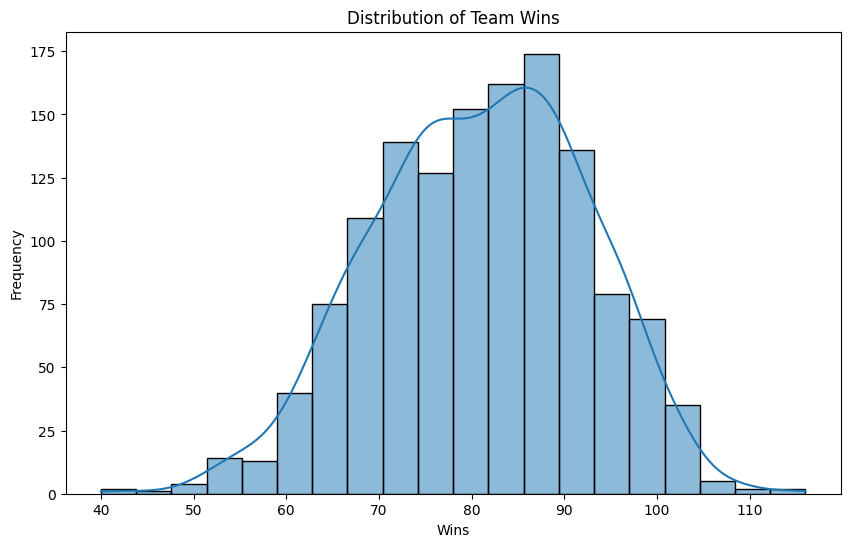

In [37]:
# Plot distribution of <team> wins
plt.figure(figsize=(10,6))
sns.histplot(teams['W'], bins=20, kde=True)
plt.title('Distribution of Team Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()


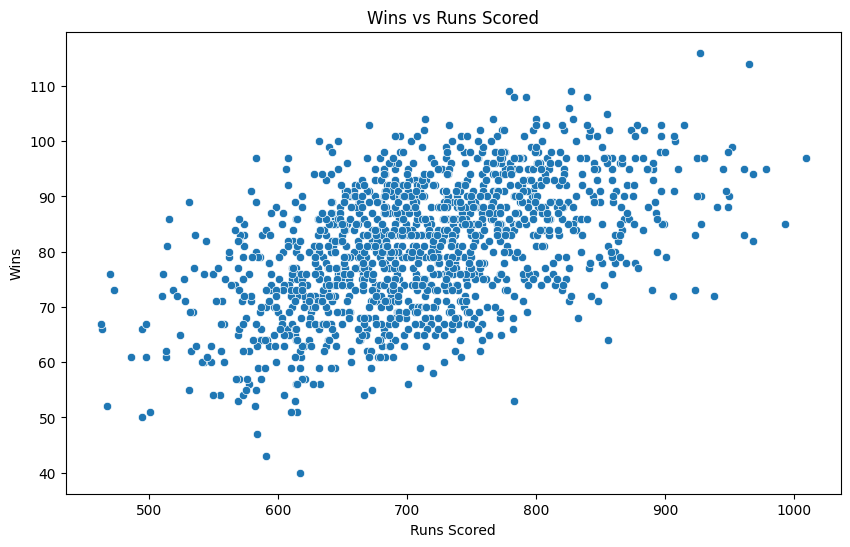

In [38]:
# Scatter plot of Wins vs Runs scored
plt.figure(figsize=(10,6))
sns.scatterplot(x='R', y='W', data=teams)
plt.title('Wins vs Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Wins')
plt.show()


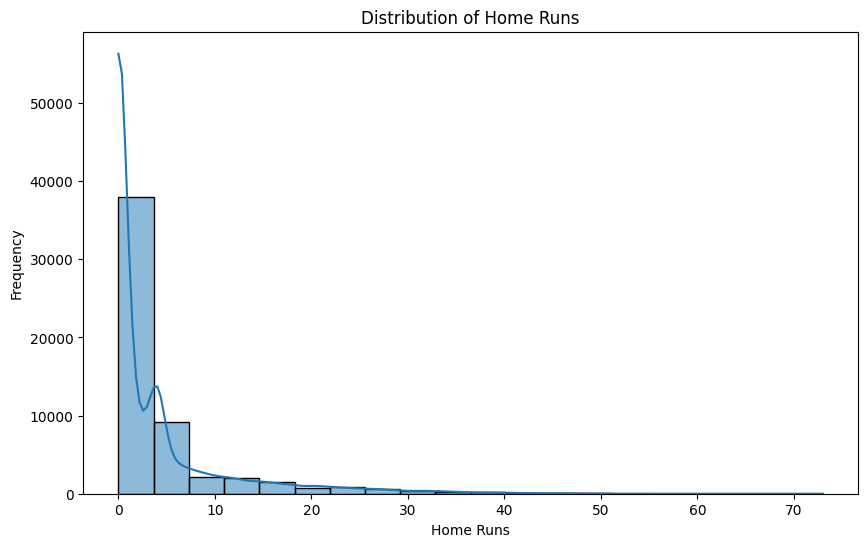

In [39]:
# Histogram of Home Runs
plt.figure(figsize=(10,6))
sns.histplot(batting['HR'], bins=20, kde=True)
plt.title('Distribution of Home Runs')
plt.xlabel('Home Runs')
plt.ylabel('Frequency')
plt.show()

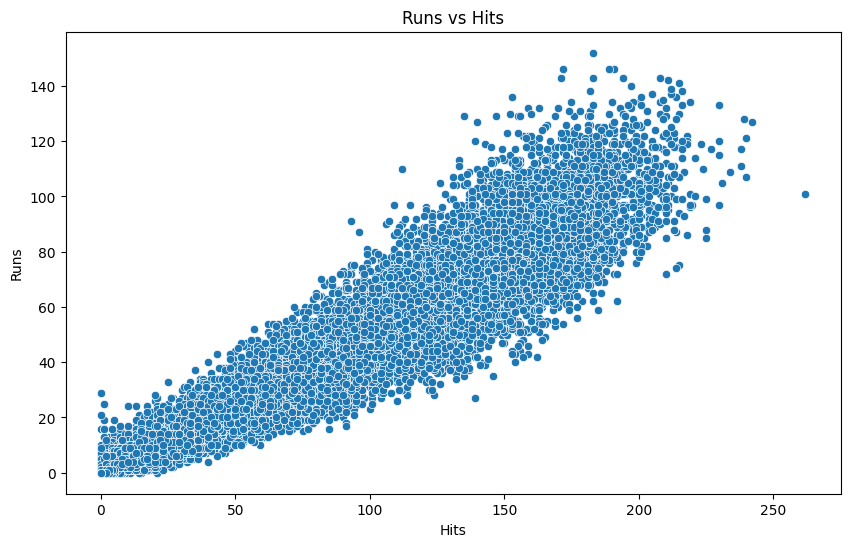

In [40]:
# Scatter plot of Runs vs Hits
plt.figure(figsize=(10,6))
sns.scatterplot(x='H', y='R', data=batting)
plt.title('Runs vs Hits')
plt.xlabel('Hits')
plt.ylabel('Runs')
plt.show()


<Axes: >

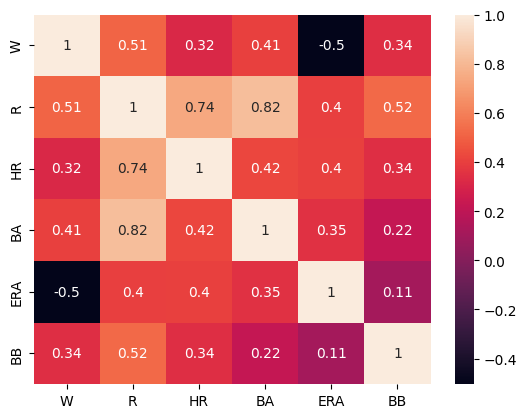

In [41]:
sns.heatmap(data = teams[['W', 'R', 'HR', 'BA', 'ERA', 'BB']].corr(numeric_only = True), annot = True)

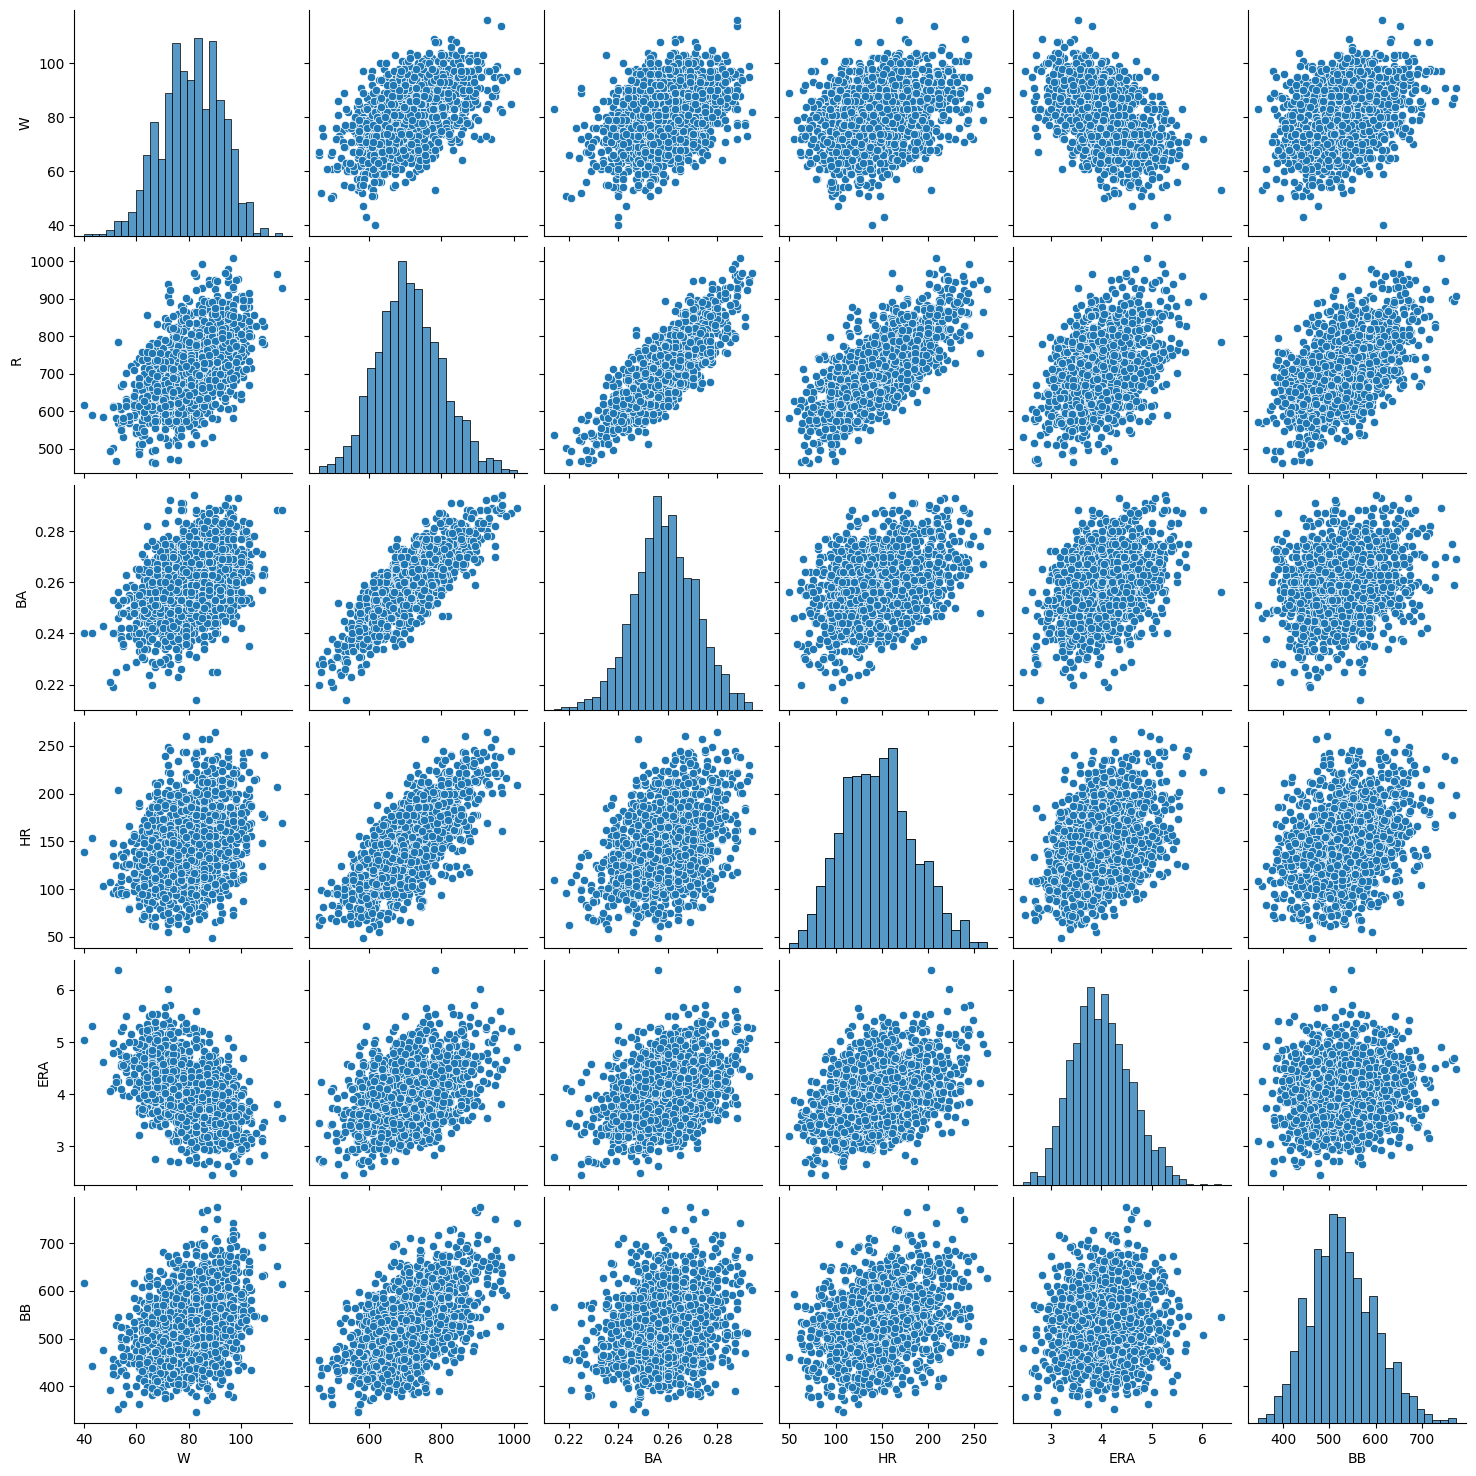

In [42]:
sns.pairplot(data = teams[['W', 'R', 'BA', 'HR', 'ERA', 'BB']])

In [43]:
px.line(teams.groupby('yearID')['W'].min(), y = 'W')

In [44]:
px.line(teams.groupby('yearID')['W'].mean(), y = 'W')

In [45]:
px.line(teams.groupby('yearID')['W'].max(), y = 'W')

In [46]:
fig = go.Figure()
max_wins = teams.groupby('yearID')['W'].max()
min_wins = teams.groupby('yearID')['W'].min()
mean_wins = teams.groupby('yearID')['W'].mean()
fig.add_trace(go.Scatter(x=min_wins.index, y=min_wins.values, mode='lines', name='Min Wins'))
fig.add_trace(go.Scatter(x=mean_wins.index, y=mean_wins.values, mode='lines', name='Mean Wins'))
fig.add_trace(go.Scatter(x=max_wins.index, y=max_wins.values, mode='lines', name='Max Wins'))
fig.update_layout(
    title = "Min, Mean, and Max Wins Over Time",
    xaxis_title = "Year",
    yaxis_title = "Wins",
    legend_title = "Wins"
)
fig.show()